In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/home/soumyajit/ProSpect_Classifier/ProSpect_Classifier/misc/error_dict.json"

with open(file_path) as f:
    data = json.load(f)

In [2]:
75*60

4500

In [3]:
df = pd.DataFrame(data)
# df=df[:-900]

In [4]:
len(df)

37875

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


accuracy = accuracy_score(df["predict"], df["actual"])
precision = precision_score(df["predict"], df["actual"], average='weighted')
conf_matrix = confusion_matrix(df["predict"], df["actual"])
recall = recall_score(df["predict"], df["actual"],average='weighted')
f1 = f1_score(df["predict"], df["actual"] , average='weighted')

In [6]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(df["predict"], df["actual"]))

Accuracy: 0.782072607260726
Precision: 0.8177164611320115
Recall: 0.782072607260726
F1 Score: 0.7899349153527949
Confusion Matrix:
 [[762   0  24 ...   0   0   0]
 [  0 593   0 ...   0   0   0]
 [  0   0 846 ...   0   0   0]
 ...
 [  0   0   0 ... 614   0   0]
 [  0   0   0 ...   3 871   0]
 [  0   0   0 ...   0   0 652]]

Classification Report:
               precision    recall  f1-score   support

           5       0.78      0.58      0.67      1314
           6       0.84      0.89      0.87       665
          12       0.82      0.96      0.88       881
          16       0.96      0.81      0.88       979
          24       0.40      0.75      0.52       445
          30       0.88      0.85      0.87       809
          32       0.51      0.81      0.62       430
          35       0.92      0.88      0.90       630
          44       0.59      0.80      0.68       558
          45       0.59      0.73      0.66       789
          51       0.20      0.93      0.33       154
  

In [24]:
file_path = "/home/soumyajit/ProSpect_Classifier/ProSpect_Classifier/class_embeddings_file/liw_200_0.005/190_error_dict.json"

with open(file_path) as f:
    data = json.load(f)
    
    
df = pd.DataFrame(data)
df = df[:-150]

In [25]:
accuracy = accuracy_score(df["predict"], df["actual"])
precision = precision_score(df["predict"], df["actual"], average='weighted')
conf_matrix = confusion_matrix(df["predict"], df["actual"])
recall = recall_score(df["predict"], df["actual"],average='weighted')
f1 = f1_score(df["predict"], df["actual"] , average='weighted')

In [26]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(df["predict"], df["actual"]))

Accuracy: 0.7837777777777778
Precision: 0.815504616371465
Recall: 0.7837777777777778
F1 Score: 0.778223249008663
Confusion Matrix:
 [[402   0   0   0   0   0   0]
 [  2 449   3   0  15   2  41]
 [ 17  40 652  11  13  26  81]
 [  6   0   0 591   1  82   3]
 [ 98 163  60  34 511  41  91]
 [ 18   3   0  67   0 505  12]
 [ 27   5   5   2   0   4 417]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       402
           1       0.68      0.88      0.77       512
           2       0.91      0.78      0.84       840
           3       0.84      0.87      0.85       683
           4       0.95      0.51      0.66       998
           5       0.77      0.83      0.80       605
           6       0.65      0.91      0.75       460

    accuracy                           0.78      4500
   macro avg       0.78      0.82      0.79      4500
weighted avg       0.82      0.78      0.78      4500



In [5]:
"""Standard error mean calculation """

def calculate_accuracy(sub_df):
    correct_predictions = (sub_df).sum()
    total_predictions = len(sub_df)
    return correct_predictions / total_predictions


window_size = 75

x = (df['actual'] == df['predict'])

rolling_accuracy = x.rolling(window=window_size)
rolling_accuracy=rolling_accuracy.apply(calculate_accuracy, raw=True)

rolling_accuracy[74::75]

74      0.893333
149     0.946667
224     0.853333
299     0.866667
374     0.853333
449     0.893333
524     0.880000
599     0.840000
674     0.866667
749     0.893333
824     0.880000
899     0.826667
974     0.853333
1049    0.906667
1124    0.813333
1199    0.826667
1274    0.960000
1349    0.853333
1424    0.880000
1499    0.933333
1574    0.840000
1649    0.826667
1724    0.813333
1799    0.933333
dtype: float64

In [6]:
z = rolling_accuracy[74::75]

z=z*100
# z=z[:60-len(z)]
print(len(z))

print(z.mean())

24
87.22222222222223


In [7]:
import numpy as np

1.96 * np.std(z)/np.sqrt(len(z))

1.6363552292256074

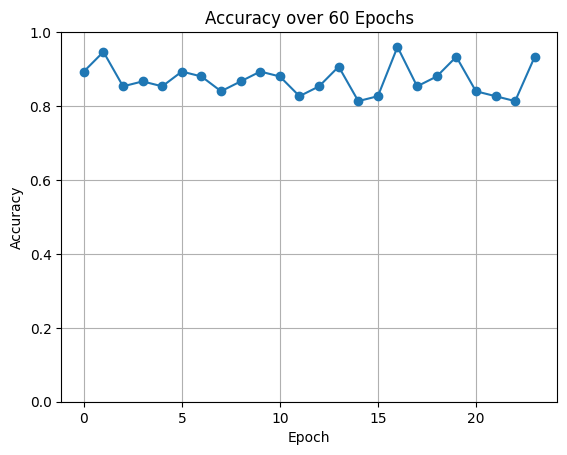

In [8]:
plt.plot(range(len(z)), rolling_accuracy[74::75], marker='o')
plt.title('Accuracy over 60 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [37]:
i = 0

n = len(df[(df['actual']==i) & (df['predict']==i) ])
d = len(df[(df['actual']==i)])

n/d

0.7052631578947368